In [36]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import expit
from scipy.optimize import minimize
import warnings

In [37]:
np.__version__

'1.18.4'

In [38]:
def pad_data(x):
    return np.pad(x, ((0,0), (1,0)), constant_values=1.)

In [39]:
class Logistic:
    def __init__(self, w=None):
        self.w = w
    
    def train(self, xs, ys, w0=None):
        padded_xs = pad_data(xs)
        if w0 is None:
            w0 = np.array([0.]*padded_xs.shape[1])
        def cost(w):
            ps = expit(ys*np.dot(padded_xs, w))
            return -np.sum(np.log(ps))
        res = minimize(cost, w0)
        self.w = res.x
        if not res.success:
            warnings.warn(res.message)
        return self
    
    def predict(self, xs):
        padded_xs = pad_data(xs)
        return expit(np.dot(padded_xs, self.w))

# Basic Performance

Let us consider a fingerprint application to authenticate people through super secret stuff. So the class +1 means authenticate(Staff) and -1 means denied entry(Spy).

## What is True Positive?

## What is False Positive?

## What is False Positive?

## What is False Negative?

## Which of the above number you want to be high and which of the above number you want to be low?

# 2 Confusion Matrix
Consider the folowing for staff(+1) and spy(-1) fingerprint (supposed that you reduce it to two numbers).

In [40]:
np.random.seed(1234)
n_sample = 1000
x1 = np.random.multivariate_normal([2,3],[[1, 0.5],[0.5,1]], size=n_sample)
x2 = np.random.multivariate_normal([3,4],[[1, -0.5],[-0.5,1]], size=n_sample)
xs = np.vstack([x1, x2])
ys = np.array([1.]*n_sample+[-1.]*n_sample)
padded_xs = pad_data(xs)

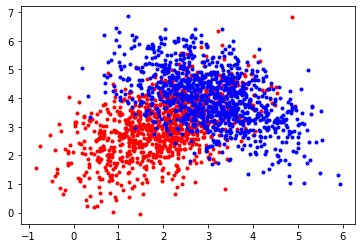

In [41]:
pos_x = xs[ys==1]
neg_x = xs[ys==-1]
plt.plot(pos_x[:,0], pos_x[:,1], '.r')
plt.plot(neg_x[:,0], neg_x[:,1], '.b')

## 2.1 Consider a classification model defined below.
Find True positive numbers, True Negative numbers, False Positive numbers, False Negative numbers. If your decision whether some one is a spy or a staff based on 0.5 probability.

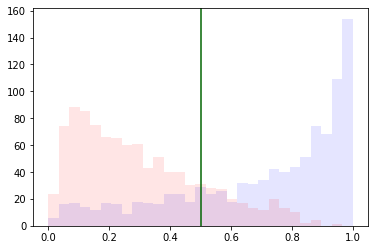

In [42]:
lgst = Logistic().train(xs, ys)
pred = lgst.predict(xs)
plt.hist(pred[ys==1],color='b',bins=np.linspace(0,1,30), alpha=0.1)
plt.hist(pred[ys==-1],color='r',bins=np.linspace(0,1,30), alpha=0.1)
plt.axvline(0.5, color='darkgreen')

In [43]:
cutOff = 0.9
truePos = np.sum((ys > 0) & (pred >= cutOff)) #staff classified as staff
print(truePos)
trueNeg = np.sum((ys < 0) & (pred <= cutOff)) #spy classified as spy
print(trueNeg)
falseNeg = np.sum((ys > 0) & (pred <= cutOff)) #staff classified as spy
print(falseNeg)
falsePos = np.sum((ys < 0) & (pred >= cutOff)) #spy classified as staff
print(falsePos)

321
999
679
1


### Now put them in this table.
This table is called confusion matrix/table.

**At cut=0.5**

|            	| Pred Staff 	| Pred Spy 	|
|------------	|------------	|----------	|
| True Staff 	|     760       |    240    |
| True Spy   	|       180     |    820    |

### If we increase the probability cut, which number will go higher and which number will go lower?

In [44]:
#Lower = true staff, 

### Draw that confusion matrix again for the cut at 0.9.

## Which cutoff is a better idea if the secret we are guarding is global nuclear launching code?

In [45]:
0.9, 0.99

(0.9, 0.99)

## Let us change the context of the data. 
If the data were fingerprint for member shopper(+1) vs non-member(-1) shopper, think watson/boots etc. Where if you are classified as a member, you get some made up discount.

# 3 Stupid Metrics People Used

As you have seen that the metric to pick the cutoff really depends on the situation/context. Here are some stupid things(non-context based number) people used as a metric to pick a cut.

## First, Precision and Recall.

Precision is defined by 

$$precision = \frac{tp}{tp+fp}$$


$$recall = \frac{tp}{tp+fn}$$

calculate precision and recall for 0.5 cut and 0.9 cut.

Do you want this number to be high or low?

In [46]:
cutOff = 0.5
truePos = np.sum((ys > 0) & (pred >= cutOff)) #staff classified as staff
print(truePos)
trueNeg = np.sum((ys < 0) & (pred <= cutOff)) #spy classified as spy
print(trueNeg)
falseNeg = np.sum((ys > 0) & (pred <= cutOff)) #staff classified as spy
print(falseNeg)
falsePos = np.sum((ys < 0) & (pred >= cutOff)) #spy classified as staff
print(falsePos)
print('precision' , truePos/(truePos + falsePos))
print('recall' , truePos/(truePos+falseNeg))

760
820
240
180
precision 0.8085106382978723
recall 0.76


## F1 Score.
This is the dumbest idea yet very popular for "data scientist" who doesn't really know what they are doing.

$$
f1 = 2 \times \frac{precision \times recall}{precision + recall}
$$

If we were to maximize this number where would we put the cut for our fingerprint application both spy+staff and member+non member problem?

Why is this a stupid idea?

49
0.49


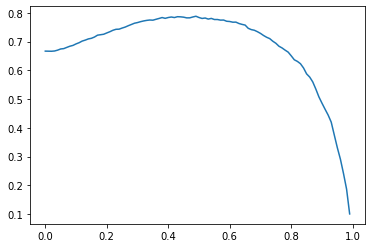

In [47]:
def f1_score(cutOff):
    truePos = np.sum((ys > 0) & (pred >= cutOff)) #staff classified as staff
#     print(truePos)
    trueNeg = np.sum((ys < 0) & (pred <= cutOff)) #spy classified as spy
#     print(trueNeg)
    falseNeg = np.sum((ys > 0) & (pred <= cutOff)) #staff classified as spy
#     print(falseNeg)
    falsePos = np.sum((ys < 0) & (pred >= cutOff)) #spy classified as staff
#     print(falsePos)
    precision = truePos/(truePos + falsePos)
    recall = truePos/(truePos + falseNeg)
    f1 = 2 * ((precision * recall)/(precision+recall))
    return f1
#     print('precision' , truePos/(truePos + falsePos))
#     print('recall' , truePos/(truePos+falseNeg))
cutOffs = np.linspace(0,0.99,100) #not one as it will have divide by zero
f1s = [f1_score(cutOff) for cutOff in cutOffs]
plt.plot(cutOffs, f1s)
best_index = np.argmax(f1s)
print(best_index)
print(cutOffs[best_index])

# ROC Curve

Let us talk about comparing two different models. Supposed you hired 2 people to build a classification model `lgst1` and `lgst2`. We want to decide which one is better.

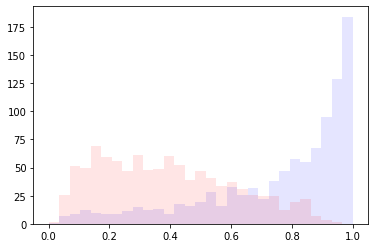

In [48]:
lgst1 = Logistic(np.array([7.1, -1.2, -1]))
pred1 = lgst1.predict(xs)
plt.hist(pred1[ys==1],color='b',bins=np.linspace(0,1,30), alpha=0.1)
plt.hist(pred1[ys==-1],color='r',bins=np.linspace(0,1,30), alpha=0.1);

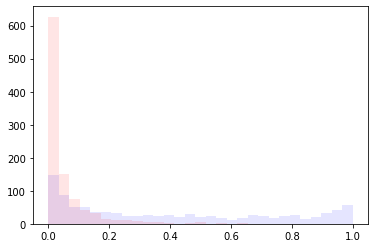

In [49]:
lgst2 = Logistic(np.array([7, -1.2, -1.8]))
pred2 = lgst2.predict(xs)
plt.hist(pred2[ys==1],color='b',bins=np.linspace(0,1,30), alpha=0.1)
plt.hist(pred2[ys==-1],color='r',bins=np.linspace(0,1,30), alpha=0.1);

## Let us define

$TPR = \frac{tp}{tp+fn}$ 
this is called true positive rate/sensitivity/10 other names. Essentially it's the fraction of true sample classified as true over all true sample.

$FPR = \frac{fp}{tn + fp}$
this is called false positive rate/10 other names.
Essentially it's fraction of false smaple classified as true over all negative sample.

If we have a perfect classifier, what should be the value for these two number?

In [50]:
#TPR = 1
#FPR = 0

## Calculate these two numbers if the cut were at 0.5 for both classifiers.


In [51]:
from dataclasses import dataclass
@dataclass
class Performance:
    truePos: float
    trueNeg: float
    falsePos: float
    falseNeg: float
    def tpr(self) -> float:
        return self.truePos/(self.truePos + self.falseNeg)
    def fpr(self) -> float:
        return self.falsePos/(self.trueNeg + self.falsePos)
    def precision(self) -> float:
        return self.truePos/(self.truePos + self.falsePos)
    def recall(self) -> float:
        return self.truePos/(self.truePos + self.falseNeg)
def calPerf(cutOff,pred):
    truePos = np.sum((ys > 0) & (pred >= cutOff)) #staff classified as staff
    trueNeg = np.sum((ys < 0) & (pred <= cutOff)) #spy classified as spy
    falseNeg = np.sum((ys > 0) & (pred <= cutOff)) #staff classified as spy
    falsePos = np.sum((ys < 0) & (pred >= cutOff)) #spy classified as staff
    return Performance(truePos = truePos, trueNeg = trueNeg, falseNeg = falseNeg, falsePos = falsePos)

## ROC Curve
For $cut \in$ `np.linspace(0,1,30)` plot FPR on x axis and TPR on y axis for both classifiers.

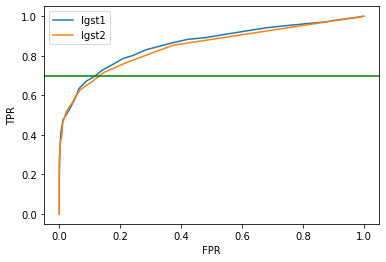

In [54]:
pred1 = lgst1.predict(xs)
pred2 = lgst2.predict(xs)
cutOffs = np.linspace(0,1,30)
perf1s = [calPerf(cutOff, pred1) for cutOff in cutOffs]
perf2s = [calPerf(cutOff, pred2) for cutOff in cutOffs]
# def plot_roc(perfs:List[Performance], **kwd):
#     tpr = [p.tpr() for p in perfs]
#     fpr = [p.fpr() for p in perfs]
#     plt.plot(fpr,tpr,**kwd)
# plot_roc(perf1s, label='lgst1')
# plot_roc(perf2s, label='lgst2')
# plt.legend()
def plot_roc(perfs, **kwd):
    tpr = [p.tpr() for p in perfs]
    fpr = [p.fpr() for p in perfs]
    plt.plot(fpr, tpr, **kwd)
plot_roc(perf1s, label='lgst1')
plot_roc(perf2s, label='lgst2')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.axhline(0.7, color='green')

### Identify where the perfect classifer should be.

### Identify where the low probability cut(0.01) is and where the high probability cut (0.99) is.

### From the plot which classifiers is better? Why?

### You can see from the above that area is not a bad idea for comparing two classifiers. 

This metric is called aucroc (Area under the curve of ROC). Calculate aucroc for both (mid point/trapezoid would do).

In [57]:
def auc_roc(perfs):
    fprs = [p.fpr() for p in perfs]  # x
    tprs = [p.tpr() for p in perfs]  # y
    area = 0.
    for xl, xr, yl, yr in zip(fprs[:-1], fprs[1:], tprs[:-1], tprs[1:]):
        width = xl-xr # fpr is running to the left as cutoff increases
        area += width * 0.5 * (yl+yr)
    return area

print('lgst1 auc roc', auc_roc(perf1s))
print('lgst2 auc roc', auc_roc(perf2s))

lgst1 auc roc 0.8605134999999997
lgst2 auc roc 0.8474080000000003


## There are more than one way to make this kind of plot.

We can also plot things like Recall(x) vs Precision(y). If we were to plot that which corner is the perfect answer?

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


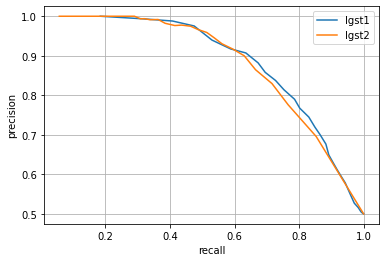

In [61]:
def plot_roc2(perfs,**kwd):
    recalls = [p.recall() for p in perfs]
    precisions = [p.precision() for p in perfs]
    plt.plot(recalls, precisions, **kwd)
plot_roc2(perf1s, label='lgst1')
plot_roc2(perf2s, label='lgst2')
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.legend()

# 5 Multiclass Problem

We want to classify yoyo in to 4 flavors using features such as package color, sweetness level.

Supposed we want to use 1 VS All algorithm. To do this.


## How many classifiers we need to train?

In [ ]:
#3

## How do we train each classifier? (Which one to call + and which one to call -)

In [ ]:
#the one with + is the specific flavour
#the one with - is te rest

## Write a table for perfect answer for each class.

## If the answer from all the classifier for a sample looks like 
$$(0.1,0.2,0.3,0.6)$$
What class should it be?

In [63]:
names = ['Grape','Cola','Apple','Strawberry']
template = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
],dtype = float)
def find_best_class(output):
    diff = (template-output)**2
    distances = np.sum(diff, axis = 1) #sum row wise
    best_index = np.argmin(distances)
    return names[best_index]
output = np.array([0.1,0.2,0.3,0.6])
find_best_class(output)

'Strawberry'

## what about
$$(0.6,0.6,0.7,0.7)$$

In [64]:
output = np.array([0.6,0.6,0.7,0.7])
find_best_class(output)

'Apple'

## How many answers we can get wrong before the classifier start getting confused?

## How can we do better against wrong answer?

## Write down the exhaustive matrix for 4 classes.

# 6 Real Exercise

Read glass.data and build a classifier to classify glass.

- Note that there is no sample for glass number 4
- Also use exhaustive matrix.
- To make your life easy forget about splitting it into train test.
- What would print/plot to make sure that your answer make sense?
- Use logistic for each classifiers.
- see glass.names.txt for data description

What is this glass?

$$1.5,14.8,0.00,2.00,73.00,0.00,8.00,1.7,0.00$$

In [65]:
data = np.loadtxt('glass.data.txt',delimeter=',')

TypeError: loadtxt() got an unexpected keyword argument 'delimeter'

In [66]:
with open('glass.data.txt') as f:
    rows = []
    for line in f:
        row = [float(s) for s in line.split(',')]
        rows.append(row)
data = np.array(rows)

In [67]:
features = data[:,1:-1]
xclasses = data[:,-1]
#make sure there is no gap
xclasses[xclasses>4] -= 1
print(xclasses)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]


In [69]:
def exhausive_matrix(n):
    rows = []
    for i in range(n):
        pat = ([1]*2**(i) + [0]*2**(i))*2**(n-i-1)
        rows.append(pat)
    rows = np.array(rows)
    rows = rows[:,1:2**(n-1)]
    return rows
names = [1.,2.,3.,5.,6.,7.]
template = exhausive_matrix(6)

In [ ]:
def make_classifier(features,xclasses,template_col):
    cls = xclasses.copy()
    for name, col_value in template_col:
        cls[cls==name] = 1 if col_value > 0.5 else -1
    